### good tutorial on youtube on PyTorch
https://www.youtube.com/@patloeber

### the scheme of any NN
0) prepare data:

  X_train X_test ... = train_test_split() ->

  -> standart scaler (if you need) ->

  -> make torch tensor

1) Model(input, output size, forward pass)

2) Loss and optimizer

3) trainig loop:
  - forward pass: compute prediction
  - backward pass: compute gradient (from optimizer)
  - update weigths 

## Example 1 in


In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
# f = w * x 
# f = 2x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# 1) model pridiction:
def forward(x):
  return w * x





In [ ]:
# 2) Loss and optimizer
learning_rate = 0.01
n_iters = 100
loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate)

In [ ]:
# 3) training loop
for epoch in range(n_iters):
  # prediction = froward pass
  y_pred = forward(X)
  # loss
  l = loss(y_pred, Y)
  # gradient = backward pass
  l.backward()

  # update gradient (this is graident by stohastick gradient) SGD see 
  optimizer.step()
  optimizer.zero_grad()

  if epoch%10 == 0:
    print(epoch, ";  loss = ", l)

print("predicting result f(5) = ", forward(5))

0 ;  loss =  tensor(30., grad_fn=<MseLossBackward0>)
10 ;  loss =  tensor(1.1628, grad_fn=<MseLossBackward0>)
20 ;  loss =  tensor(0.0451, grad_fn=<MseLossBackward0>)
30 ;  loss =  tensor(0.0017, grad_fn=<MseLossBackward0>)
40 ;  loss =  tensor(6.7705e-05, grad_fn=<MseLossBackward0>)
50 ;  loss =  tensor(2.6244e-06, grad_fn=<MseLossBackward0>)
60 ;  loss =  tensor(1.0176e-07, grad_fn=<MseLossBackward0>)
70 ;  loss =  tensor(3.9742e-09, grad_fn=<MseLossBackward0>)
80 ;  loss =  tensor(1.4670e-10, grad_fn=<MseLossBackward0>)
90 ;  loss =  tensor(5.0768e-12, grad_fn=<MseLossBackward0>)
predicting result f(5) =  tensor(10.0000, grad_fn=<MulBackward0>)


###Now in this section we will use nn.module for class of our model

0) prepare data:

  X_train X_test ... = train_test_split() ->

  -> standart scaler (if you need) ->

  -> make torch tensor

1) Model(input, output size, forward pass)

2) Loss and optimizer

3) trainig loop:
  - forward pass: compute prediction
  - backward pass: compute gradient (from optimizer)
  - update weigths 

In [ ]:
# 0) prepare data
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)
# we don't need the weigth, becaus the pytorch now about parameters

n_samples, n_features = X.shape
input_size = n_features
output_size = n_samples

class MyLinearRegressin(nn.Module):
  def __init__(self, input_dim, output_dim):
    super().__init__()
    # define layers:
    self.lin1 = nn.Linear(input_dim, output_dim)
  def forward(self, x):
    return self.lin1(x)


# set the model:
model = MyLinearRegressin(input_size, output_size)
#model = nn.Linear(input_size, output_size)
# set the model:


In [ ]:
# 2) Loss and optimizer
learning_rate = 0.01
n_iters = 200
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# 3) training loop
for epoch in range(n_iters):
  # prediction = froward pass
  y_pred = model(X)
  # loss
  l = loss(y_pred, Y)
  # gradient = backward pass
  l.backward()

  # update gradient (this is graident by stohastick gradient) SGD see 
  optimizer.step()
  optimizer.zero_grad()

  if epoch%10 == 0:
    [w, b] = model.parameters()
    print(epoch, ";  loss = ", l, "; w = ", w[0][0].item())
with torch.no_grad():
  print(model(X_test))

0 ;  loss =  tensor(27.9300, grad_fn=<MseLossBackward0>) ; w =  0.8610782027244568
10 ;  loss =  tensor(11.9636, grad_fn=<MseLossBackward0>) ; w =  1.2499399185180664
20 ;  loss =  tensor(5.1586, grad_fn=<MseLossBackward0>) ; w =  1.5038385391235352
30 ;  loss =  tensor(2.2578, grad_fn=<MseLossBackward0>) ; w =  1.6696326732635498
40 ;  loss =  tensor(1.0207, grad_fn=<MseLossBackward0>) ; w =  1.7779115438461304
50 ;  loss =  tensor(0.4927, grad_fn=<MseLossBackward0>) ; w =  1.8486443758010864
60 ;  loss =  tensor(0.2668, grad_fn=<MseLossBackward0>) ; w =  1.8948663473129272
70 ;  loss =  tensor(0.1697, grad_fn=<MseLossBackward0>) ; w =  1.925087332725525
80 ;  loss =  tensor(0.1275, grad_fn=<MseLossBackward0>) ; w =  1.9448624849319458
90 ;  loss =  tensor(0.1087, grad_fn=<MseLossBackward0>) ; w =  1.9578182697296143
100 ;  loss =  tensor(0.0998, grad_fn=<MseLossBackward0>) ; w =  1.9663219451904297
110 ;  loss =  tensor(0.0953, grad_fn=<MseLossBackward0>) ; w =  1.971919059753418
120

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


### In this section i realized the Logostick regrsiion from **PyTorch Tutorial 08 - Logistic Regression** 

In [ ]:
# 0) prepare data
# 1) desing model (input, output size, forward pass)
# 2) loss fucntion and optimizer
# 3) training loop 
#     - forward pass: prediction and loss
#     - backward pass: gradient
#     - updata weigth

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# ===========================================
# 0) prepare data
# ===========================================
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
print(n_samples, n_features)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234)

# scale our features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)


569 30


In [ ]:
# ===========================================
# 0) Model:  f = wx + b; and sigmoid function
# ===========================================

class MyLogisticRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(MyLogisticRegression, self).__init__()
    # defie layers
    self.lin1 = nn.Linear(input_dim, output_dim)
  def forward(self, x):
    # calc sigmaid
    y_pred = torch.sigmoid(self.lin1(x))
    return y_pred

model = MyLogisticRegression(n_features, 1)

In [ ]:
# ===========================================
# 0) Loos and optimizer
# ===========================================
learning_rate = 0.01
loss_model = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [ ]:
# ===========================================
# 3) Train loop
# ===========================================
num_epochs = 100
for epoch in range(num_epochs):
  # prediction = froward pass
  y_pred = model(X_train)

  # loss
  loss = loss_model(y_pred, y_train)
  # gradient = backward pass
  loss.backward()

  # update gradient (this is graident by stohastick gradient) SGD see 
  optimizer.step()
  optimizer.zero_grad()

  if epoch%10 == 0:
    [w, b] = model.parameters()
    print(epoch, ";  loss = ", loss.item(), "; ")



0 ;  loss =  0.6461326479911804 ; 
10 ;  loss =  0.5059477686882019 ; 
20 ;  loss =  0.4243365228176117 ; 
30 ;  loss =  0.3717879056930542 ; 
40 ;  loss =  0.3349918723106384 ; 
50 ;  loss =  0.30755510926246643 ; 
60 ;  loss =  0.2861320972442627 ; 
70 ;  loss =  0.26882028579711914 ; 
80 ;  loss =  0.2544576823711395 ; 
90 ;  loss =  0.24229273200035095 ; 


In [ ]:
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

accuracy: 0.9123


# Часть 1. Датасет moons

Давайте сгенерируем датасет и посмотрим на него!

<class 'numpy.ndarray'>


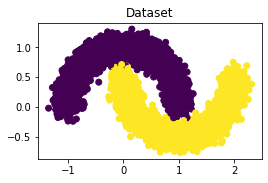

In [ ]:
X, y = make_moons(n_samples=10000, random_state=42, noise=0.1)
print(type(X))
plt.figure(figsize=(4, 2.5))
plt.title("Dataset")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis")
plt.show()

In [ ]:
# ===========================================
# 0) prepare data
# ===========================================

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

X_train_t = torch.from_numpy(X_train).to(torch.float32)
y_train_t = torch.from_numpy(y_train).to(torch.float32)
X_val_t = torch.from_numpy(X_val).to(torch.float32)
y_val_t = torch.from_numpy(y_val).to(torch.float32)
print(X_train_t.shape)
print(y_train_t)



# совмещение двух тензоров: 

train_dataset = TensorDataset(X_train_t, y_train_t)
val_dataset = TensorDataset(X_val_t, y_val_t)
train_dataloader = DataLoader(train_dataset, batch_size=128)
val_dataloader = DataLoader(val_dataset, batch_size=128)


torch.Size([7500, 2])
tensor([1., 1., 0.,  ..., 1., 1., 0.])


In [ ]:
# ===========================================
# ) Model:  f = wx + b; and sigmoid function
# ===========================================


class LinearRegression(nn.Module):
    def __init__(self, in_features: int, out_features: int, bias: bool = True):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(in_features))
        self.bias = bias
        if bias:
            self.bias_term = nn.Parameter(torch.randn(out_features))
    def forward(self, x):
        x = x @ self.weights
        if self.bias:
          x += self.bias_term
        return x

model = LinearRegression(2, 1)


In [ ]:
# ===========================================
# 0) Loos and optimizer
# ===========================================
learning_rate = 0.05
loss_model = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [ ]:
tol = 1e-3
losses = []
max_epochs = 100
prev_weights = torch.zeros_like(model.weights)
stop_it = False
for epoch in range(max_epochs):
    for it, (X_batch, y_batch) in enumerate(train_dataloader):
        
        # forward pass predict and loss
        outp =   model(X_batch) # YOUR CODE. Use linear_regression to get outputs
        loss =  loss_model(outp, y_batch) # YOUR CODE. Compute loss

        # backward pass
        loss.backward()

        losses.append(loss.detach().flatten()[0])
        # update gradient (this is graident by stohastick gradient) SGD see 
        optimizer.step()
        optimizer.zero_grad()

        probabilities = F.sigmoid(outp) # YOUR CODE. Compute probabilities
        preds = (probabilities > 0.5).type(torch.long)

    if stop_it:
        break

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


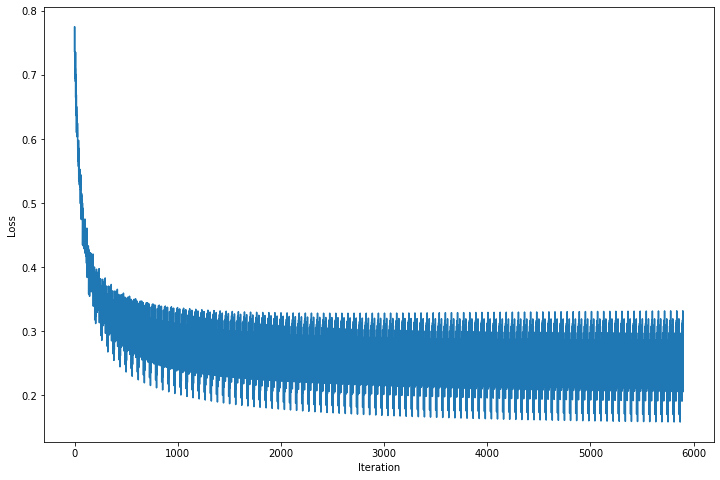

In [ ]:
def show_loss(losses):
    plt.figure(figsize=(12, 8))
    plt.plot(range(len(losses)), losses)
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.show()
show_loss(losses)

In [ ]:
def show_separation(model, save=False, name_to_save=""):
    sns.set(style="white")

    xx, yy = np.mgrid[-1.5:2.5:.01, -1.:1.5:.01]
    # set point grid 
    grid = np.c_[xx.ravel(), yy.ravel()]
    batch = torch.from_numpy(grid).type(torch.float32)
    with torch.no_grad():
        # we calc probabiluty of points in the griid
        probs = torch.sigmoid(model(batch).reshape(xx.shape))
        probs = probs.numpy().reshape(xx.shape)

    f, ax = plt.subplots(figsize=(16, 10))
    ax.set_title("Decision boundary", fontsize=14)
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                          vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])

    ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)

    ax.set(xlabel="$X_1$", ylabel="$X_2$")
    if save:
        plt.savefig(name_to_save)
    else:
        plt.show()

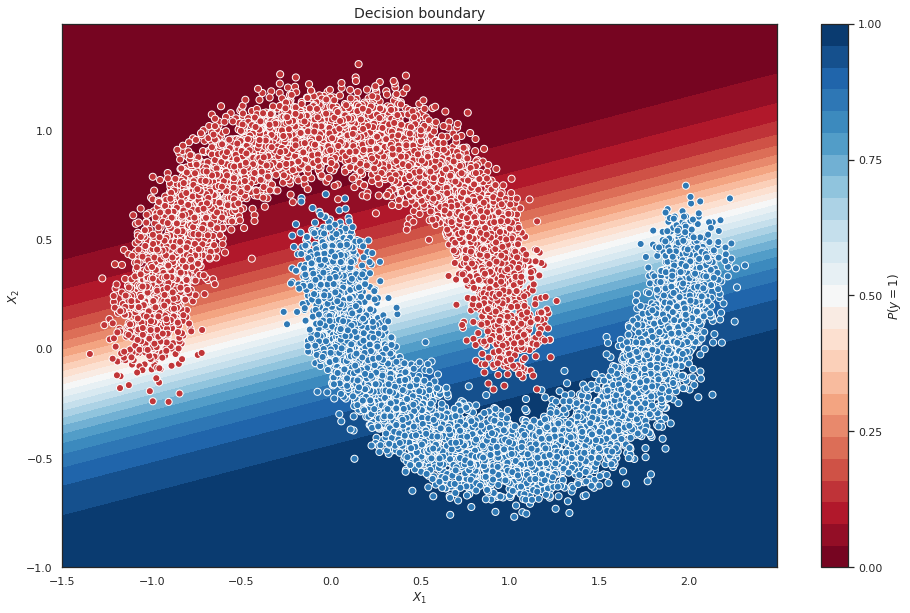

In [ ]:
show_separation(model)

### In this section we creati a many layers NN for classifir task

In [ ]:
#model = nn.Sequential(
#    nn.Linear(2, 30),
#    nn.ReLU(),
#    nn.Linear(30, 20),
#    nn.ReLU(),
#    nn.Linear(20, 1)
#)

#loss_function = nn.BCEWithLogitsLoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

class MoonClass(nn.Module):
  def __init__(self, input_dim, H_in_layer, output_dim):
    super(MoonClass, self).__init__()
    # defie layers
    self.lin1 = nn.Linear(input_dim, H_in_layer)
    self.act1 = nn.ReLU()
    self.lin2 = nn.Linear(H_in_layer, H_in_layer - 10)
    self.act2 = nn.ReLU()
    self.lin3 = nn.Linear( H_in_layer - 10, 1)


  def forward(self, x):
    #print(x.shape)
    x = self.act1(self.lin1(x))
    #print(x.shape)
    x = self.act2(self.lin2(x))
    #print(x.shape)
    x = self.lin3(x)
    return x

model = MoonClass(2, 30, 1)

In [ ]:
loss_model = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

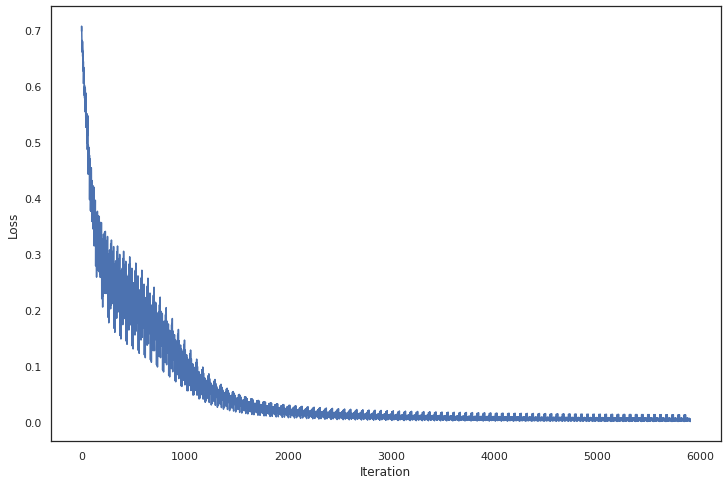

In [ ]:
losses = []
for epoch in range(max_epochs):
    for it, (X_batch, y_batch) in enumerate(train_dataloader):
        
        # forward pass predict and loss
        outp =   model(X_batch) # YOUR CODE. Use linear_regression to get outputs
        #print("x_batch; ", type(X_batch.view(X_batch.shape[0], -1)))
        #print("x_batch; ", X_batch.view(X_batch.shape[0], -1).shape)
        #print("y_batch; ", type(y_batch))
        #print("y_batch; ", y_batch.shape)
        #print("y_pred; ", type(outp))
        #print("y_pred; ", outp.flatten().shape)
        #print("y_pred; ", outp.view(outp.shape[0], -1).shape)
        loss =  loss_model(outp.flatten(), y_batch) # YOUR CODE. Compute loss


        # backward pass
        loss.backward()

        losses.append(loss.detach().flatten()[0])
        # update gradient (this is graident by stohastick gradient) SGD see 
        optimizer.step()
        optimizer.zero_grad()

        probabilities = F.sigmoid(outp) # YOUR CODE. Compute probabilities
        preds = (probabilities > 0.5).type(torch.long)

    if stop_it:
        break
show_loss(losses)

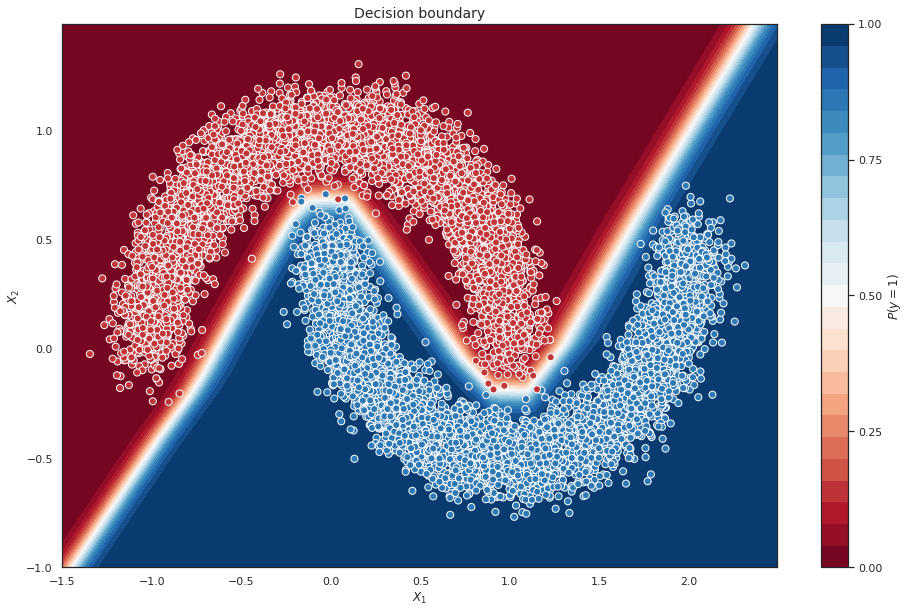

In [ ]:
show_separation(model)